In [1]:
# 步骤
# 1.读取NPZ文件
# 2.onehot 独热编码
# 3.分为train和test数据
# 4.搭建CNN模型
# 5.训练模型
# 6.保存模型

In [2]:
## 1.读取NPZ文件

In [3]:
import numpy as np

In [4]:
arr = np.load('./data/imageData.npz')

In [5]:
img_list = arr['arr_0']
label_list =arr['arr_1']

In [6]:
img_list.shape,label_list.shape

((7100, 100, 100, 3), (7100,))

## 2.onehot 独热编码

In [7]:
np.unique(label_list)

array(['1.yes', '2.no', '3.nose'], dtype='<U6')

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [9]:
# 实例化
onehot = OneHotEncoder()

In [10]:
# 编码
y_onehot =onehot.fit_transform(label_list.reshape(-1,1))

In [11]:
y_onehot_arr = y_onehot.toarray()

In [12]:
y_onehot_arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## 3.分为train和test数据

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(img_list,y_onehot_arr,test_size=0.2,random_state=42)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5680, 100, 100, 3), (1420, 100, 100, 3), (5680, 3), (1420, 3))

## 4.搭建CNN模型

In [16]:
# pip install --upgrade tensorflow
# pip install tensorflow-gpu==版本号  # GPU

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [18]:
# 搭建模型

![](./cnn.png)

In [19]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(166,activation='relu'),
    layers.Dense(22,activation='relu'),
    layers.Dense(3,activation='sigmoid')
])

In [20]:
# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [21]:
# 预览模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

## 5.训练模型

In [22]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=15)

Epoch 1/15
190/190 [==============================] - 23s 112ms/step - loss: nan - accuracy: 0.3981 - val_loss: nan - val_accuracy: 0.3634
Epoch 2/15
190/190 [==============================] - 22s 114ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 3/15
190/190 [==============================] - 22s 113ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 4/15
190/190 [==============================] - 22s 113ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 5/15
190/190 [==============================] - 20s 105ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 6/15
190/190 [==============================] - 19s 101ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 7/15
190/190 [==============================] - 19s 100ms/step - loss: nan - accuracy: 0.3548 - val_loss: nan - val_accuracy: 0.3634
Epoch 8/15
190/190 [=======

In [23]:
# 查看训练效果


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
history_pd = pd.DataFrame(history.history)

In [26]:
history_pd

,loss,accuracy,val_loss,val_accuracy
0,NaN,0.398063,NaN,0.36338
1,NaN,0.354754,NaN,0.36338
2,NaN,0.354754,NaN,0.36338
3,NaN,0.354754,NaN,0.36338
4,NaN,0.354754,NaN,0.36338
5,NaN,0.354754,NaN,0.36338
6,NaN,0.354754,NaN,0.36338
7,NaN,0.354754,NaN,0.36338
8,NaN,0.354754,NaN,0.36338
9,NaN,0.354754,NaN,0.36338


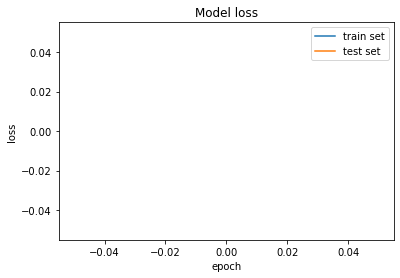

In [27]:
# 查看损失
plt.plot(history_pd['loss'])
plt.plot(history_pd['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

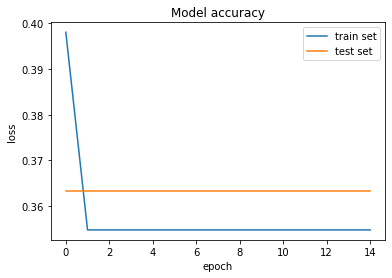

In [28]:
# 查看准确率
plt.plot(history_pd['accuracy'])
plt.plot(history_pd['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

## 6.保存模型

In [29]:
model.save('./data/face_mask_model')

INFO:tensorflow:Assets written to: ./data/face_mask_model\assets
